# Attacking the `/caption_image` endpoint
# [model: `BLIP 1 large - local`]

## Imports & configs

In [5]:
import os
import requests
import hashlib
import json
import matplotlib.pyplot as plt
from IPython.display import Image as Display_Image
from PIL import Image

user_uuid = "2be57bb075c4c7d6d4bfb2b61b526ef5ffcd4ffc9edfb1f0cff25d57aca7edab"
API_URL = f"http://localhost:14080/caption_images/hq/{user_uuid}"

## Utils

In [6]:
def calculate_sha1(file_path):
    sha1 = hashlib.sha1()
    with open(file_path, "rb") as f:
        while chunk := f.read(8192):
            sha1.update(chunk)
    return sha1.hexdigest()

## Data loading

In [7]:
image_files = [
    ("images", ("1.jpg", open("images/1.jpg", "rb"))),
    ("images", ("2.jpg", open("images/2.jpg", "rb"))),
]

metadata = json.dumps(
    [
        {"image_order": 1, "image_hash": calculate_sha1("images/1.jpg")},
        {"image_order": 2, "image_hash": calculate_sha1("images/2.jpg")},
    ]
)

## Initiating the request

In [8]:
try:
    response = requests.post(API_URL, files=image_files, data={"metadata" : metadata})

    print("Status Code:", response.status_code)
    print("Response:", response.json())

    captions = response.json()
    captions = captions["captions"]
except requests.exceptions.RequestException as e:
    print("An error occurred while making the request:", e)
finally:
    for _, (_, image_file) in image_files:
        image_file.close()

Status Code: 200
Response: {'captions': [{'image_order': 1, 'caption': 'there is a man that is sitting on a couch with a guitar in his hand and a guitar in his other hand and a window in the back of the room behind him is a brown couch with a window and a brown chair and a brown couch with a brown chair and a brown chair and a window'}, {'image_order': 2, 'caption': 'there is a man and two small children standing in a room with a woman and a man and a child standing in a room with a man and a woman and a child and a woman and a man and two children standing in a bed and a woman and a woman and a boy and a child'}]}


## Plotting the results

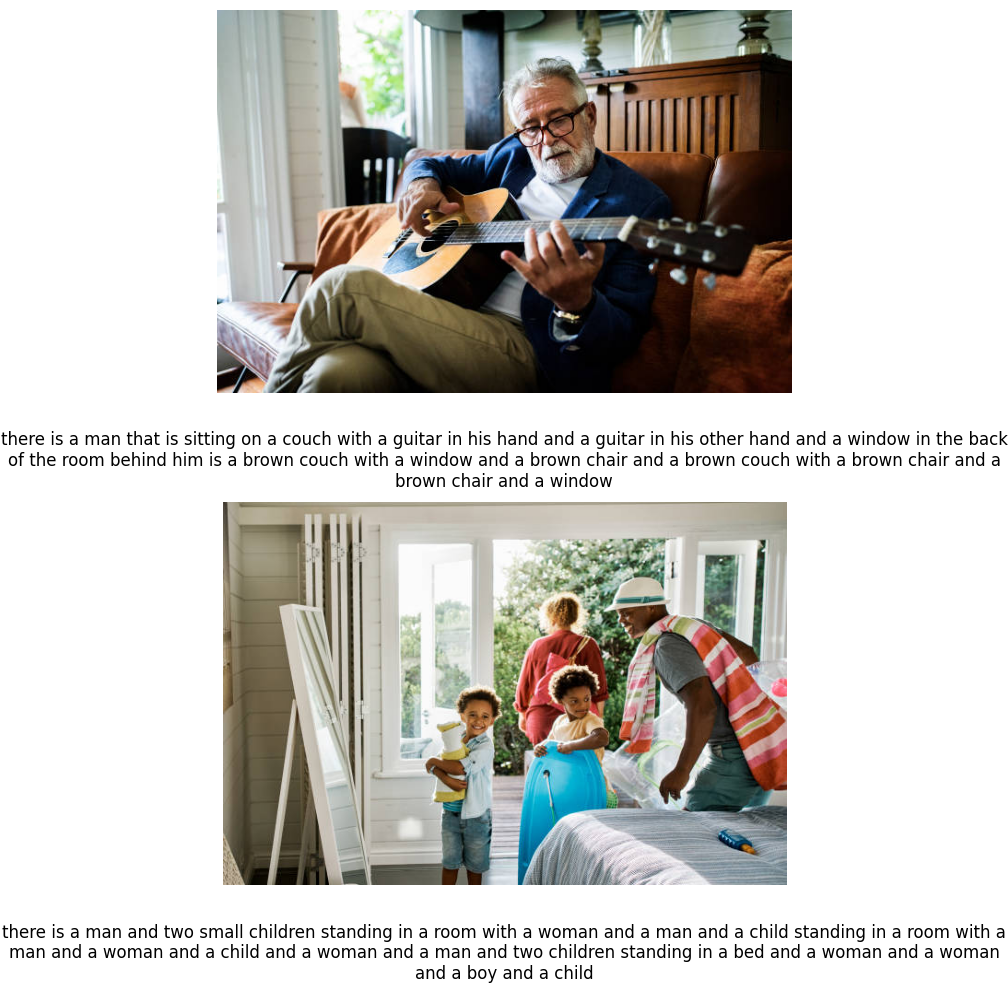

In [10]:
num_images = len(captions)
plt.figure(figsize=(10, 5 * num_images))

for i in range(num_images):
    plt.subplot(num_images, 1, i + 1)
    img_path = f"images/{i + 1}.jpg"
    img = Image.open(img_path)
    
    plt.imshow(img)
    plt.axis('off')

    caption_text = captions[i]["caption"]
    plt.text(0.5, -0.1, caption_text, ha='center', va='top', fontsize=12, wrap=True, transform=plt.gca().transAxes)

plt.tight_layout()
os.makedirs("./captioned_images", exist_ok=True)
plt.savefig("captions.png")
plt.show()